In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [6]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 15s 18ms/step - loss: 0.2142 - accuracy: 0.9363 - val_loss: 0.0862 - val_accuracy: 0.9746
Epoch 2/5
750/750 [==============================] - 15s 20ms/step - loss: 0.0564 - accuracy: 0.9823 - val_loss: 0.0640 - val_accuracy: 0.9799
Epoch 3/5
750/750 [==============================] - 14s 19ms/step - loss: 0.0392 - accuracy: 0.9876 - val_loss: 0.0491 - val_accuracy: 0.9852
Epoch 4/5
750/750 [==============================] - 12s 17ms/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.0472 - val_accuracy: 0.9868
Epoch 5/5
750/750 [==============================] - 11s 15ms/step - loss: 0.0244 - accuracy: 0.9920 - val_loss: 0.0411 - val_accuracy: 0.9877


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0305 - accuracy: 0.9904
Test accuracy: 0.9904000163078308


In [11]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

1/1 [==============================] - 0s 75ms/step
Skipping visualization for layer 5 due to unexpected shape: (1, 576)
Skipping visualization for layer 6 due to unexpected shape: (1, 64)
Skipping visualization for layer 7 due to unexpected shape: (1, 10)


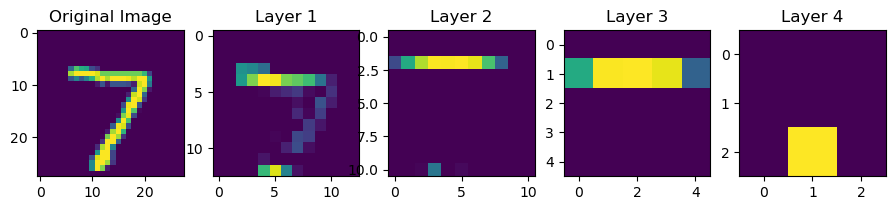

In [12]:
sample_image = test_images[0]
sample_image = np.expand_dims(sample_image, axis=0)  # Add batch dimension
sample_label = np.argmax(test_labels[0])

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(sample_image)

plt.figure(figsize=(20, 20))
plt.subplot(1, len(activations) + 1, 1)
plt.imshow(sample_image[0, :, :, 0], cmap='viridis')
plt.title('Original Image')

for i, activation in enumerate(activations[1:]):
    if len(activation.shape) == 4:  
        plt.subplot(1, len(activations) + 1, i + 2)
        plt.imshow(activation[0, :, :, 0], cmap='viridis')
        plt.title(f'Layer {i + 1}')
    else:
        print(f"Skipping visualization for layer {i + 1} due to unexpected shape: {activation.shape}")

plt.show()